# AUTOMOBILE - DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

## READING DATA AND GETTING AN OVERVIEW OF IT

Read the CSV file and create a DataFrame.

In [2]:
df = pd.read_csv('automobile.txt', delimiter=",")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Looking at our data we can see that some of the column headers have hyphenated words which will make specifying them
in certain methods unusable because we will receive an error. So we replace the hyphens with underscores.

In [3]:
df.columns = df.columns.str.replace('-', "_")

As we can see, we don't have any null values in our dataset.

In [4]:
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

So here we run a unique method on all the columns to see what values we have. Upon closer inspection we find that some missing values have been logged as "?".

In [5]:
for x in df.columns[0:]:
    print(x,"-----\n", df[x].unique())

symboling -----
 [ 3  1  2  0 -1 -2]
normalized_losses -----
 ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make -----
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type -----
 ['gas' 'diesel']
aspiration -----
 ['std' 'turbo']
num_of_doors -----
 ['two' 'four' '?']
body_style -----
 ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels -----
 ['rwd' 'fwd' '4wd']
engine_location -----
 ['front' 'rear']
wheel_base -----
 [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  

We run a for loop through all the columns that performs a condition on each value of a column and if it equals "?", then we count
all of it's occurrences in that column and print it.

In [6]:
for x in df.columns[0:]:
     for y in df[x].unique():
         if y == "?":
            print(x,">>>>>", df[x].value_counts()["?"])


normalized_losses >>>>> 41
num_of_doors >>>>> 2
bore >>>>> 4
stroke >>>>> 4
horsepower >>>>> 2
peak_rpm >>>>> 2
price >>>>> 4


## CLEANING OF THE DATA

Cleaning the 'normalized_losses' field.

In [7]:
nl = df['normalized_losses'].loc[df['normalized_losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
df['normalized_losses'] = df['normalized_losses'].replace('?',nlmean).astype(int)
df['normalized_losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized_losses, dtype: int64

Clean the 'num_of_doors' data by removing the rows with values "?"

In [8]:
df['num_of_doors'].loc[df['num_of_doors'] == '?']
df = df[df['num_of_doors'] != '?']
df['num_of_doors'].loc[df['num_of_doors'] == '?']

Series([], Name: num_of_doors, dtype: object)

Clean 'bore'. Replace the non-numeric value to null and covert datatype to int

In [9]:
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

Clean 'stroke'. Replace the non-number value to null and convert the datatype

In [10]:
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')
df.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

Cleaning the 'horsepower' by replacing the missing values with the mean value of the dataset and convert the datatype to integer.

In [11]:
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)

Cleaning 'peak_rpm'. Convert the non-numeric data to null and convert the datatype to int.

In [12]:
df['peak_rpm'] = pd.to_numeric(df['peak_rpm'],errors='coerce')
df.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

Cleaning the 'price' data by replacing the missing four datapoints with a mean value of the column and convert the datatype to int.

In [13]:
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

## ANALYSIS

#### 1) Make and Selected Catergories Crosstab Cmap
Looking at the crosstab cmap below we utilise seven categorical variables to be visualised over one that contains the different body styles of the different makes of vehicle. This provides a useful breakdown of the vehicles in the different body styles.

In [14]:
pd.crosstab([df.make, df.fuel_type, df.aspiration, df.num_of_doors, df.drive_wheels, df.engine_type, df.num_of_cylinders], df.body_style, margins=True).style.background_gradient(cmap='summer')

#### 2) Price Range per Body Style - Boxplots
For a pricing comparison per 'body_style' we will create boxplots per body_style that show the maximum, minimum and mean values of the cars in the dataset.

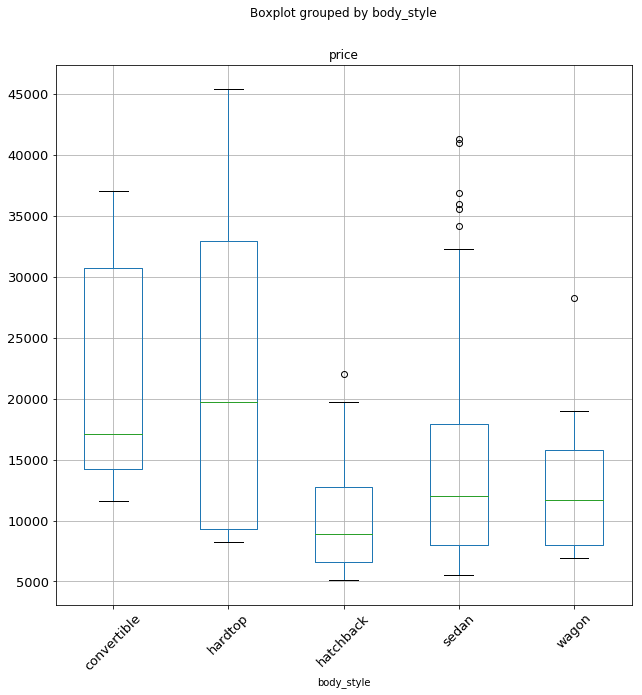

In [15]:
df.boxplot(column='price', by='body_style', figsize=(10,10), fontsize=13, grid=True, rot=45)

#### 3) Price Range per Make and Body Style - Boxplots
We create another boxplot visualisation that further extrapolates the pricing information and allocates boxes to the make of each body_style.

Text(0, 0.5, 'Price')

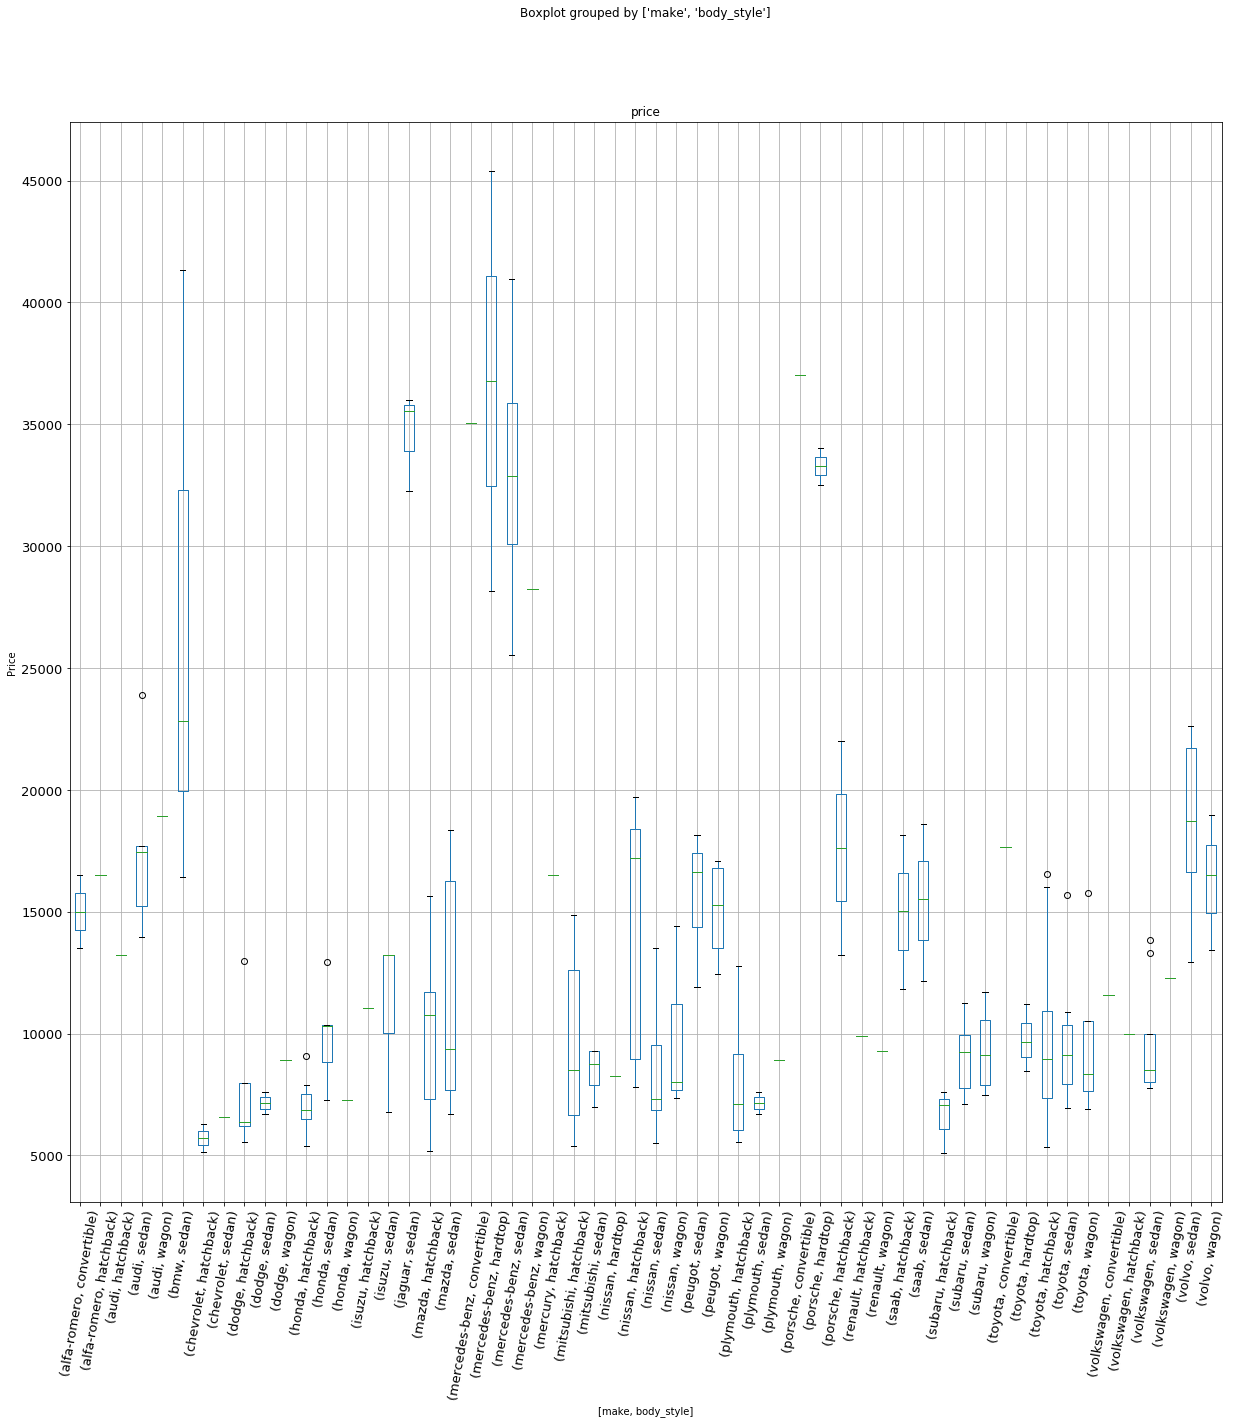

In [16]:
df.boxplot(column='price', by=['make','body_style'], figsize=(20,20), fontsize=13, grid=True, rot=80)
plt.ylabel('Price')

#### 4) Percentage representation - Pie Chart
We can have a look at which make of vehicle has the largest representation in the dataset by plotting a pie chart. As we can see, Toyota has the largest representation in the dataset.

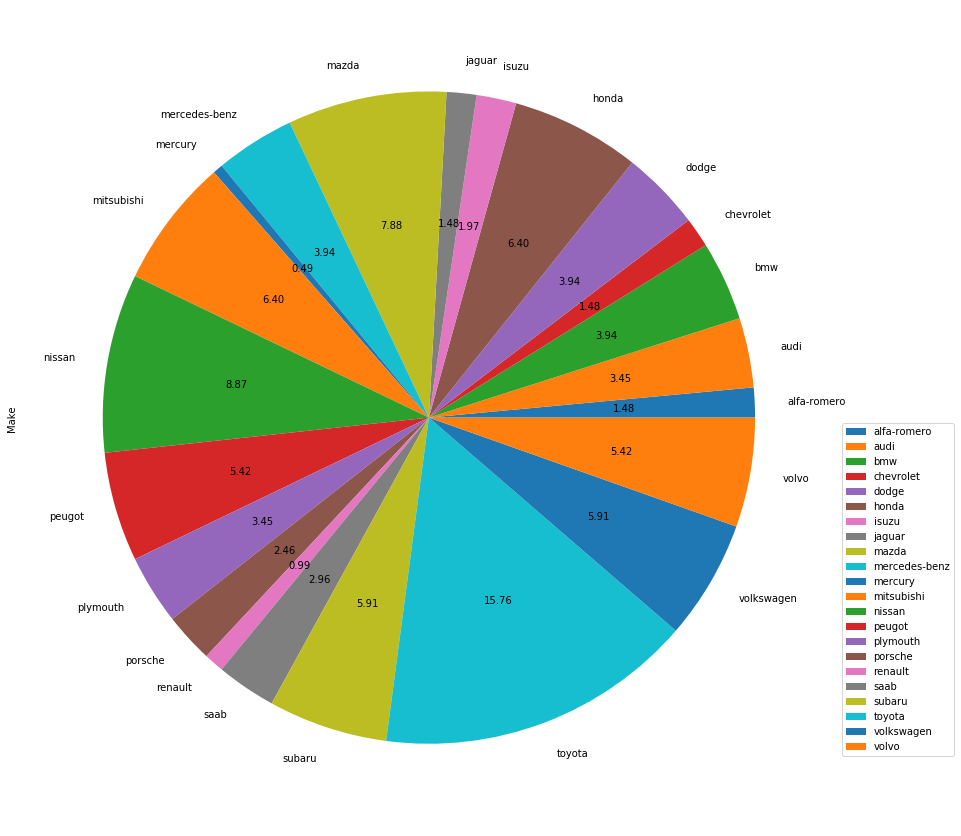

In [17]:
group_by_make = df.groupby(by='make')
count_make = group_by_make.count()
count_make = pd.DataFrame(count_make.iloc[:,1])
count_make.rename(columns={'normalized_losses': 'Make'}, inplace=True)
count_make.plot.pie(subplots=True, figsize=(15,15), fontsize=10, autopct='%.2f')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### 5) Fuel Type Split - Bar Chart
Looking at the visualisation below we can see that the majority of vehicles listed in this dataset is with 'fuel_type' gas.

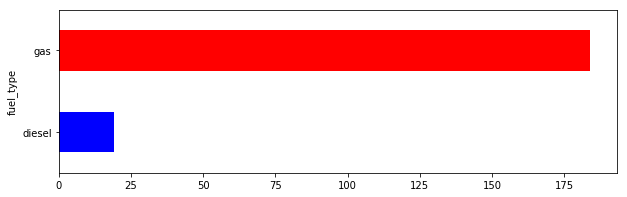

In [18]:
group_by_ft = df.groupby(by='fuel_type')
count_val = group_by_ft.count()
features_of_interest = pd.DataFrame({'Make': count_val['make']})
features_of_interest.plot(kind='barh', figsize=(10, 3), color='br', legend=None)


#### 6) Aspiration Type Split - Pie Chart
Aspiration Type pie diagram. This visualisation shows the percentage split between normal and turbo aspirated vehicles in the dataset.

Text(0.5, 0, 'Fuel Type')

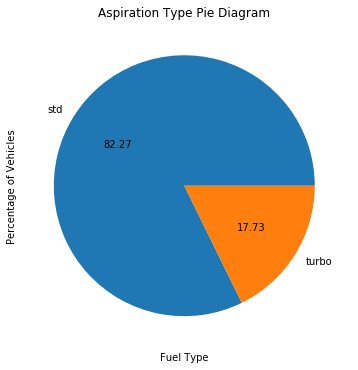

In [19]:
df['aspiration'].value_counts().plot.pie(figsize=(6,6), autopct='%.2f')
plt.title('Aspiration Type Pie Diagram')
plt.ylabel('Percentage of Vehicles')
plt.xlabel('Fuel Type')

#### 7) Normalized Losses Spread - Histogram
Normalized losses histogram. We choose 6 bins to display the spread of values over the dataset.

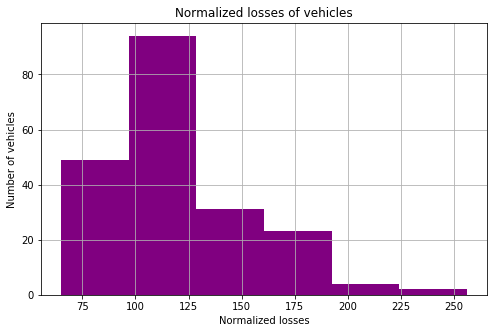

In [20]:
df['normalized_losses'].hist(bins=6, color='purple', figsize=(8,5))
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

#### 8) Symbolising Risk Factor - Histogram
Symbolising Risk Factor. We choose 6 bins here too, to display the spread of values over the dataset.

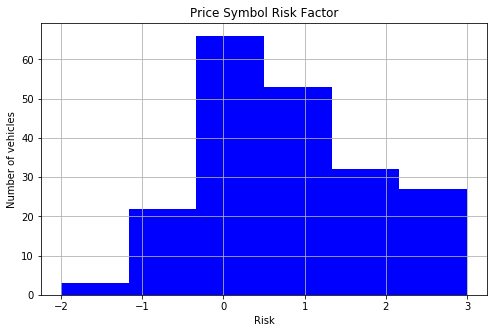

In [21]:
df['symboling'].hist(bins=6, color='blue', figsize=(8,5))
plt.title("Price Symbol Risk Factor")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk');

#### 9) Drive Wheels - Bar Chart
Histogram of number of vehicles per 'drive_wheels' category variable.

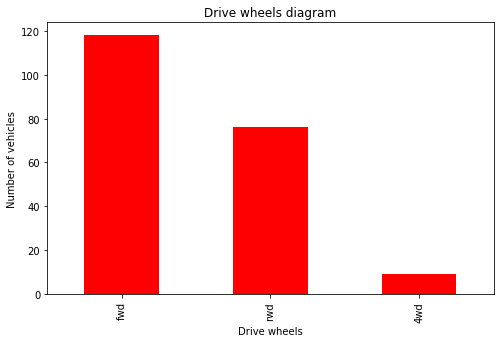

In [22]:
df['drive_wheels'].value_counts().plot(kind='bar',color='red', figsize=(8,5))
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

#### 10) Number of Doors Frequency - Bar Chart
Barchart of number of vehicles per the 'num_of_doors' variable.

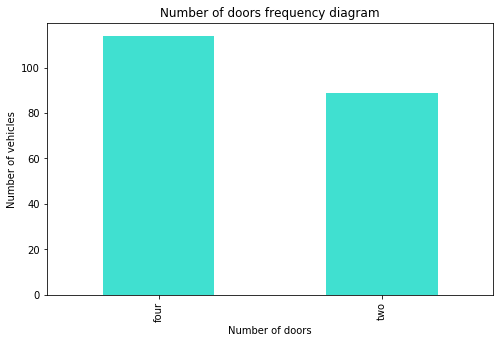

In [23]:
df['num_of_doors'].value_counts().plot(kind='bar',color='turquoise', figsize=(8,5))
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

#### 11) Make, Fuel Type, Engine Size, Aspiration Group - Horizontal Bar Chart
The below visualisation may look busy but it can serve as a matrix in which the average economy of all the vehicle types in the dataset can be found. Typically one would compare similar engine sizes, aspiration types and fuel types grouped with one another (typically by make). The third subplot shows the count in each group. Obviously looking further into these we will find the breakdown of the rest of the info per vehicle like for example which are of body_style hatchback with four doors and front wheel drive etc.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a16afd588>,
      dtype=object)

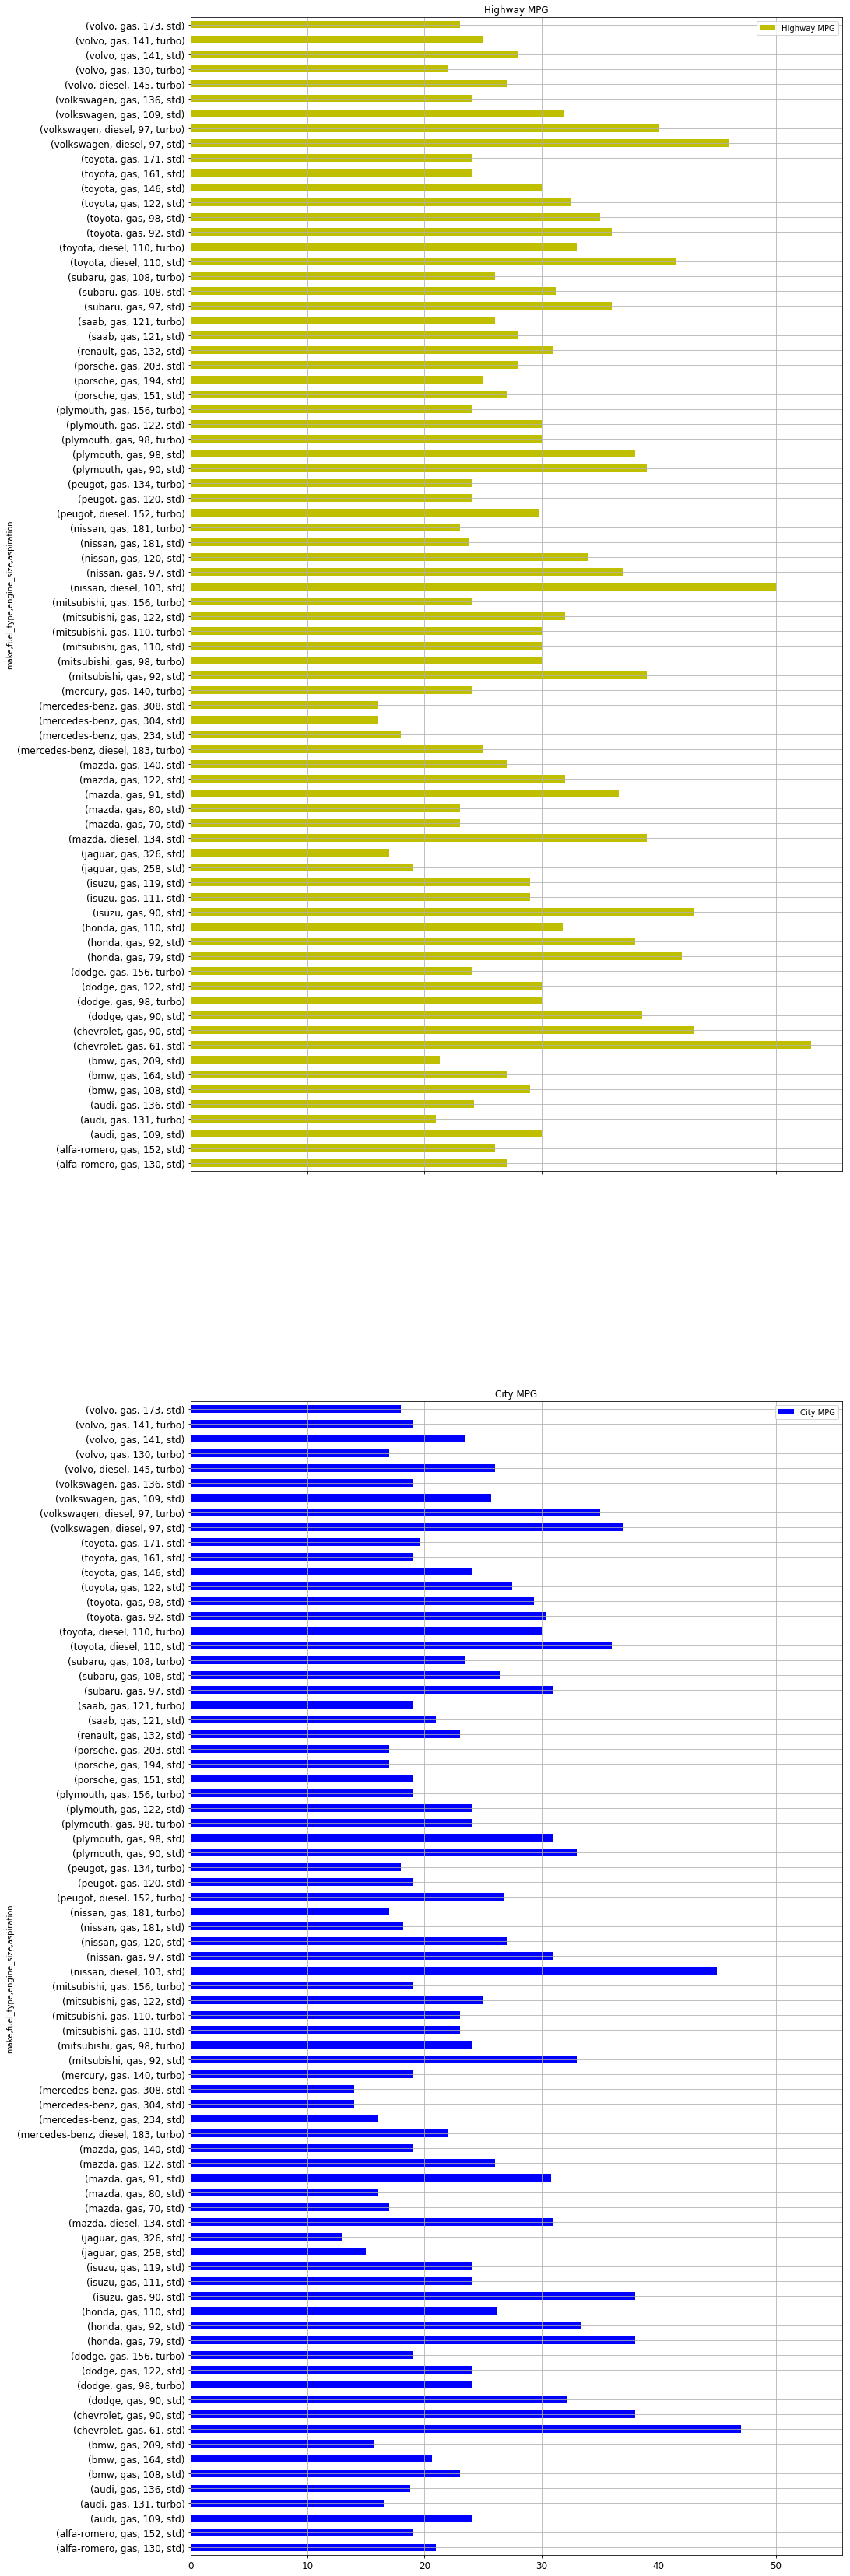

In [24]:
group_by_make = df.groupby(by=['make','fuel_type', 'engine_size', 'aspiration'])
ave_calc = group_by_make.mean()
count = group_by_make.count()
features_of_interest = pd.DataFrame({'Highway MPG': ave_calc['highway_mpg'],
                                    'City MPG': ave_calc['city_mpg']})
features_of_interest.plot(kind='barh', figsize=(15, 60), subplots=2, fontsize=12, grid=True, color='yb')

#### 12) Horsepower, Bore, Stroke Per Curb Weight - Line Diagrams

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a17bf8fd0>,
      dtype=object)

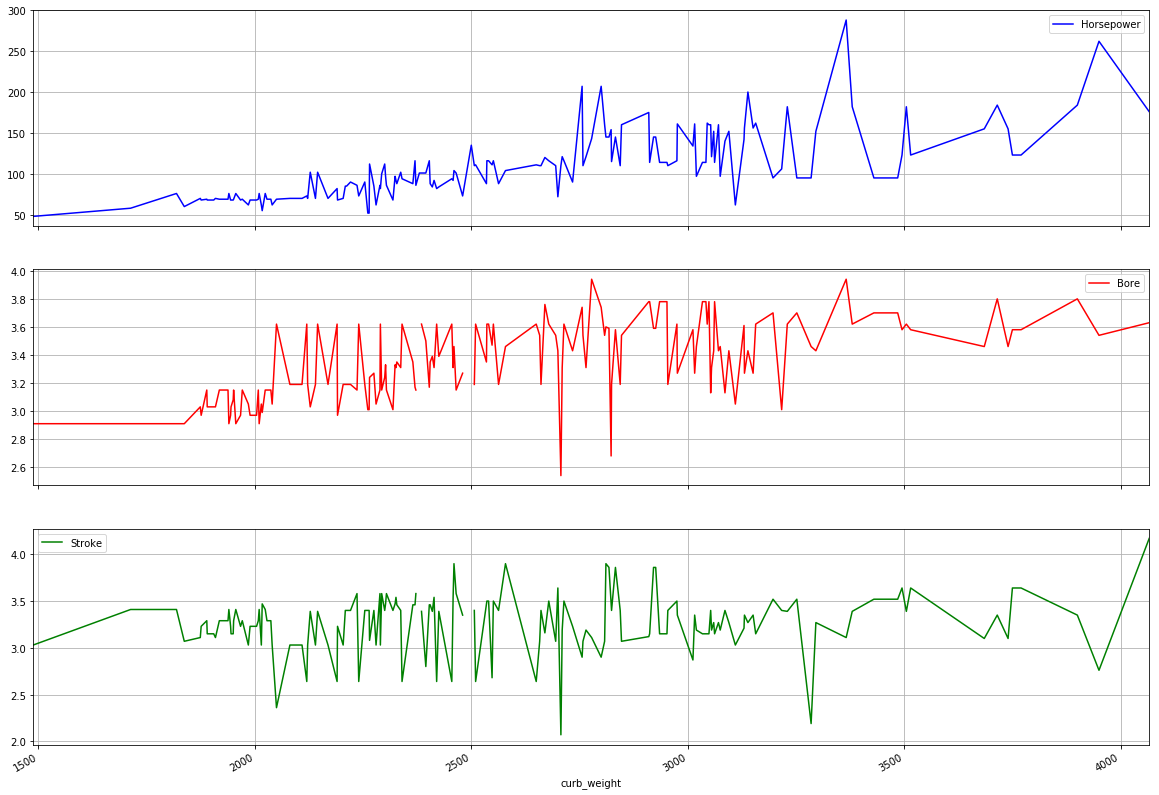

In [30]:
group_by_ftype = df.groupby(by=['curb_weight'])
max_val = group_by_ftype.max()
fot = pd.DataFrame({'Horsepower': max_val['horsepower'],
                   'Bore': max_val['bore'],
                   'Stroke': max_val['stroke']})
fot.plot(kind='line', subplots=True, color='brg', grid=True, figsize=(20,15))